In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import rating data
data = pd.read_csv('ml-latest-small/ratings.csv')

In [3]:
print(data.shape)
data.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# import title and gener of movie.
title = pd.read_csv('ml-latest-small/movies.csv')

In [5]:
title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# merge the ratings with the title and gener.
data = pd.merge(data,title,on = 'movieId')

In [7]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
title        100836 non-null object
genres       100836 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [10]:
# create new dataframe with avg ratings.
df = pd.DataFrame(data.groupby('title')['rating'].mean()) 

In [11]:
df.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [12]:
# number of users gave ratting to a particular movie.
df['number_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 

In [13]:
df.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


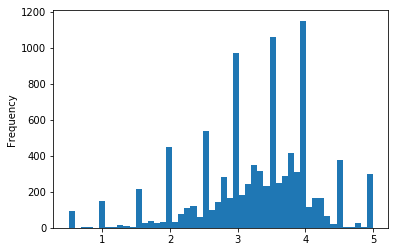

In [14]:
# histogram of ratings
df['rating'].plot(kind = 'hist',bins=50)

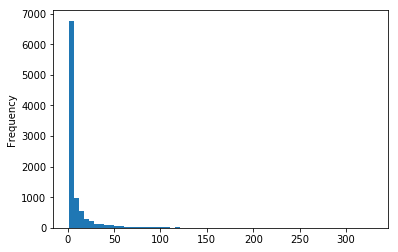

In [15]:
# histogram for number of ratings
df['number_of_ratings'].plot(kind = 'hist',bins=60)

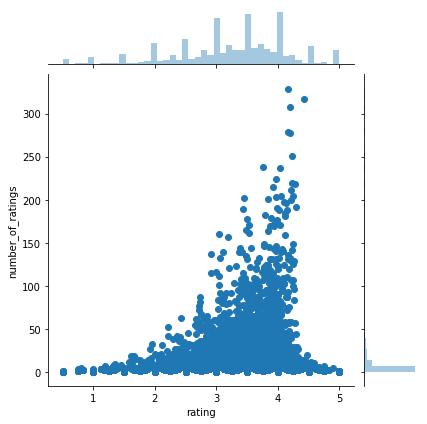

In [16]:
import seaborn as sns
sns.jointplot('rating','number_of_ratings',data = df)

In [17]:
# create matrix using data where columns represents movies and index represented by userId
movie_matrix = data.pivot_table(index='userId',columns='title',values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.sort_values('number_of_ratings',ascending = False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [19]:
# recommendation using movie 'Air Force One (1997)' and movie 'Contact (1997)'.
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [20]:
#AFO_user_rating.head()
#contact_user_rating.head()

In [21]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)
similar_to_air_force_one.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [22]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)
similar_to_contact.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [23]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640


In [24]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000


In [25]:
corr_AFO = corr_AFO.join(df['number_of_ratings'])
corr_contact = corr_contact.join(df['number_of_ratings'])

In [26]:
corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [27]:
# consider the movies which have high number of ratings for recommendations.
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107
Apollo 13 (1995),0.536136,201
Twister (1996),0.511892,123
American Pie (1999),0.501064,103
"Truman Show, The (1998)",0.500529,125


In [28]:
corr_contact[corr_contact['number_of_ratings']>100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144


In [36]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [40]:
mat = data.pivot_table(index='userId',columns='movieId',values='rating')

In [43]:
mat.fillna(0,inplace=True)
mat.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# caluculate user wise similarity.
from sklearn.metrics.pairwise import pairwise_distances
user_s = pairwise_distances(mat, metric='cosine')

In [52]:
# calculate Item wise similarity.
item_s = pairwise_distances(mat.T, metric='cosine')